In [46]:
import pandas as pd
import numpy as np 

In [47]:
data = pd.read_csv(r'C:\Users\rakes\Documents\Raq files\Data Science\Data sets\clevelanda.csv')
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [48]:
data['updated_class'] = data['class'].apply(lambda x:1 if x>0 else 0)


In [49]:
X = data.iloc[:,:13]
print(X.head())

   age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0   63       1   1       145   233    1        2      150      0      2.3   
1   67       1   4       160   286    0        2      108      1      1.5   
2   67       1   4       120   229    0        2      129      1      2.6   
3   37       1   3       130   250    0        0      187      0      3.5   
4   41       0   2       130   204    0        2      172      0      1.4   

   slope ca thal  
0      3  0    6  
1      2  3    3  
2      2  2    7  
3      3  0    3  
4      1  0    3  


In [50]:
y = data.iloc[:,-1]
print(y.head())

0    0
1    1
2    1
3    0
4    0
Name: updated_class, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2) 

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [53]:
data.isnull().sum()

age              0
gender           0
cp               0
trestbps         0
chol             0
fps              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
class            0
updated_class    0
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   gender         303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fps            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  class          303 non-null    int64  
 14  updated_class  303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [55]:
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class,updated_class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [56]:
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [57]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [58]:
data['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [59]:
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [60]:
data = data.replace('?', np.nan)

In [61]:
data['thal'].unique()

array(['6', '3', '7', nan], dtype=object)

In [62]:
data['ca'].unique()

array(['0', '3', '2', '1', nan], dtype=object)

In [63]:
data = data.dropna()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            297 non-null    int64  
 1   gender         297 non-null    int64  
 2   cp             297 non-null    int64  
 3   trestbps       297 non-null    int64  
 4   chol           297 non-null    int64  
 5   fps            297 non-null    int64  
 6   restecg        297 non-null    int64  
 7   thalach        297 non-null    int64  
 8   exang          297 non-null    int64  
 9   oldpeak        297 non-null    float64
 10  slope          297 non-null    int64  
 11  ca             297 non-null    object 
 12  thal           297 non-null    object 
 13  class          297 non-null    int64  
 14  updated_class  297 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 37.1+ KB


In [65]:
data['ca']= pd.to_numeric(data['ca'])
data['thal']= pd.to_numeric(data['thal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            297 non-null    int64  
 1   gender         297 non-null    int64  
 2   cp             297 non-null    int64  
 3   trestbps       297 non-null    int64  
 4   chol           297 non-null    int64  
 5   fps            297 non-null    int64  
 6   restecg        297 non-null    int64  
 7   thalach        297 non-null    int64  
 8   exang          297 non-null    int64  
 9   oldpeak        297 non-null    float64
 10  slope          297 non-null    int64  
 11  ca             297 non-null    int64  
 12  thal           297 non-null    int64  
 13  class          297 non-null    int64  
 14  updated_class  297 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 37.1 KB


In [66]:
X = data.iloc[:,:13]
print(X.head())

   age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0   63       1   1       145   233    1        2      150      0      2.3   
1   67       1   4       160   286    0        2      108      1      1.5   
2   67       1   4       120   229    0        2      129      1      2.6   
3   37       1   3       130   250    0        0      187      0      3.5   
4   41       0   2       130   204    0        2      172      0      1.4   

   slope  ca  thal  
0      3   0     6  
1      2   3     3  
2      2   2     7  
3      3   0     3  
4      1   0     3  


In [67]:
y = data.iloc[:,-1]
print(y.head())

0    0
1    1
2    1
3    0
4    0
Name: updated_class, dtype: int64


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2) 

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

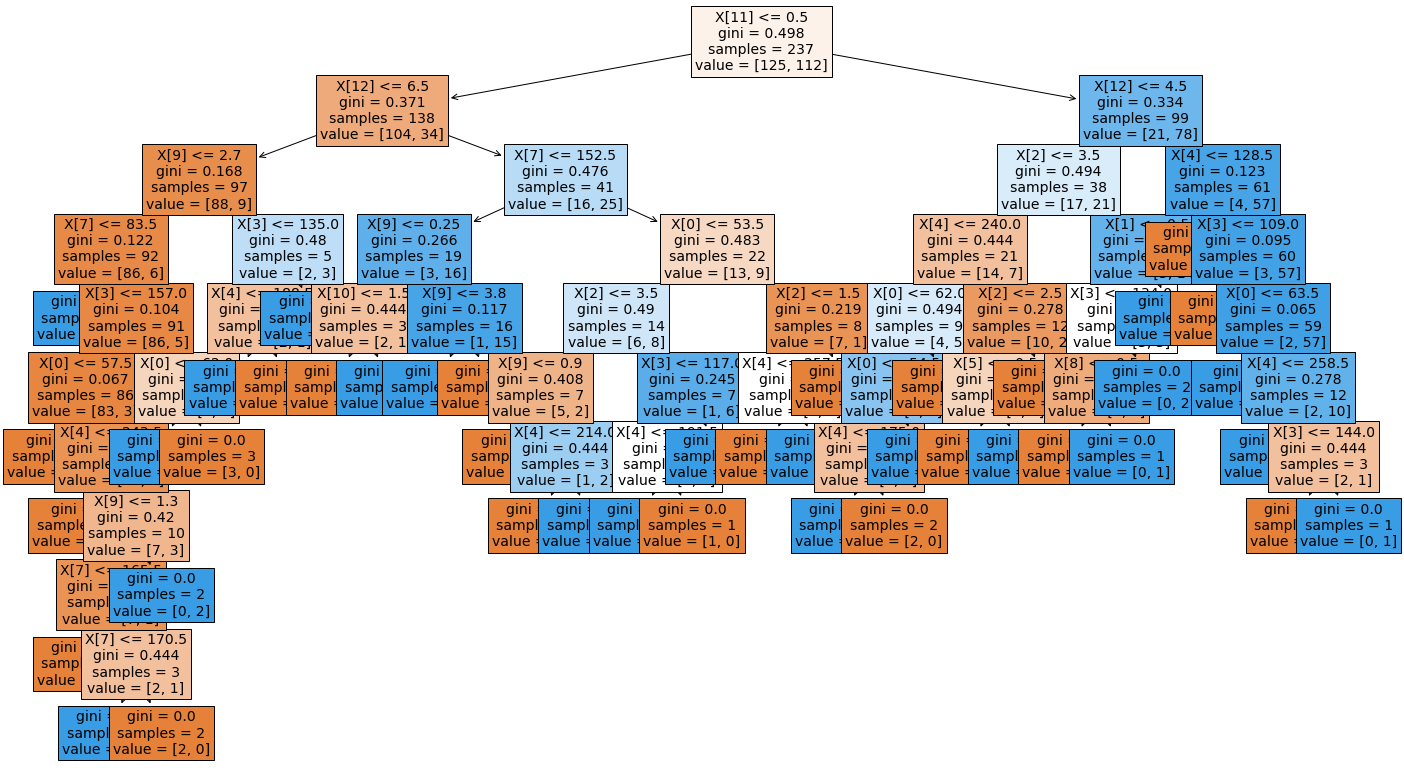

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14);

In [79]:
"""Min_impurity_split parameter can be used to control the tree based on impurity values.
It sets a threshold on gini. For instance,
if min_impurity_split is set to 0.3,
a node needs to have a gini value that is more then 0.3 to be further splitted."""

model = DecisionTreeClassifier(min_impurity_decrease=0.1)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.1)

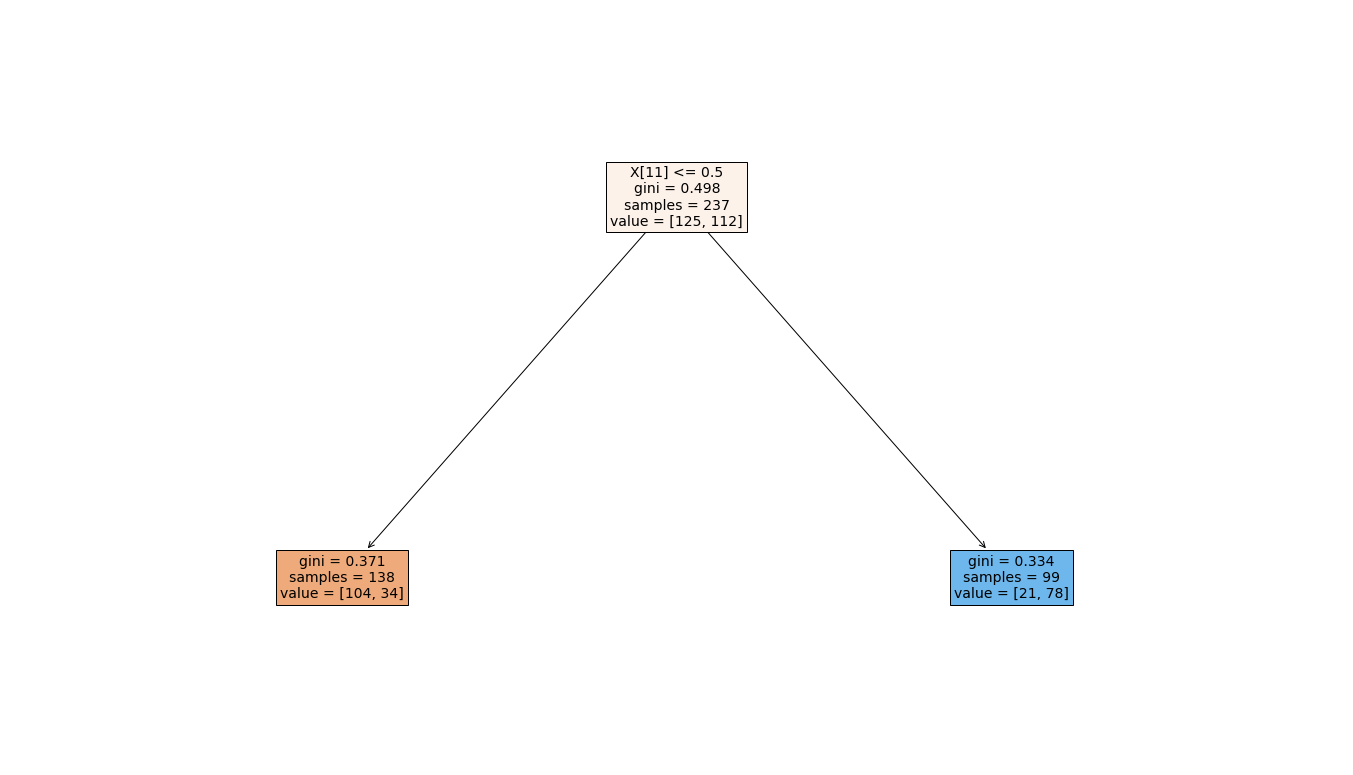

In [80]:
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14);

In [83]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

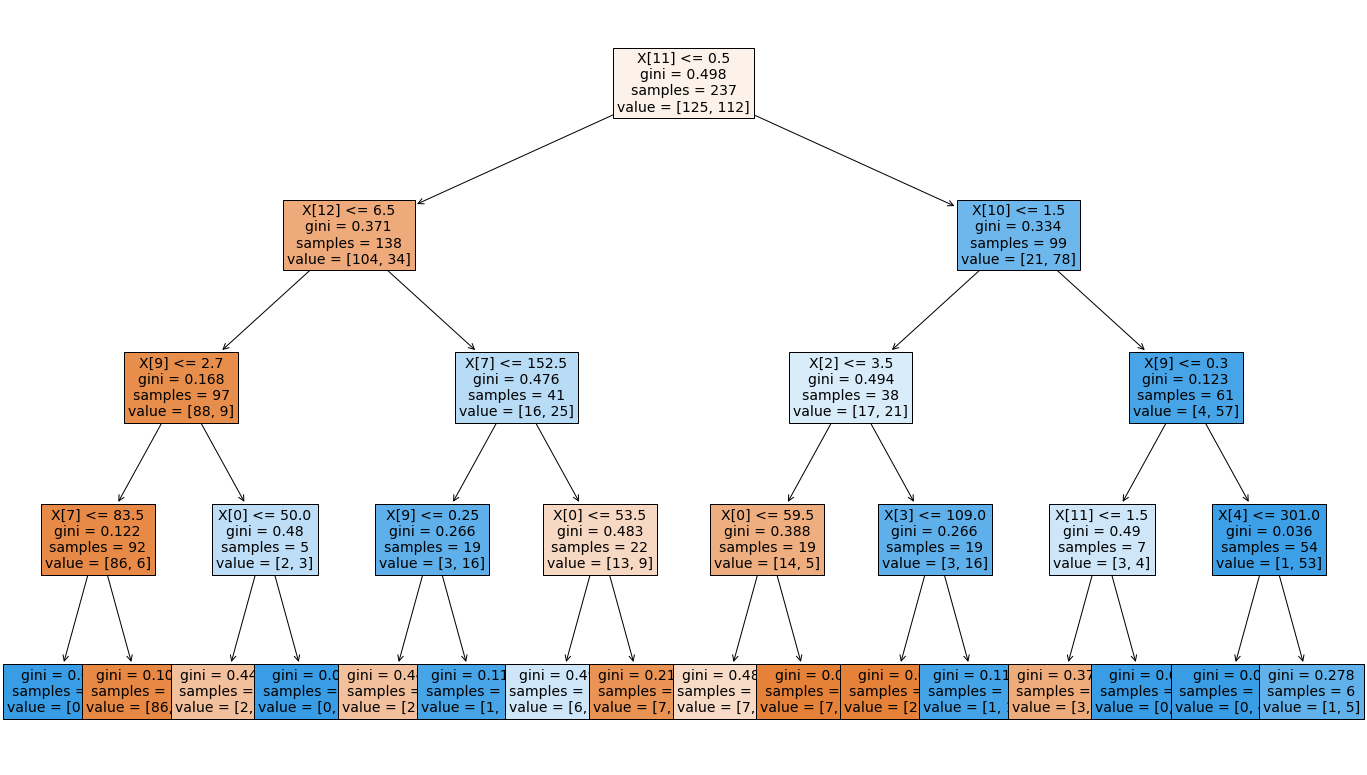

In [84]:
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14);

In [85]:
model = DecisionTreeClassifier(max_leaf_nodes=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

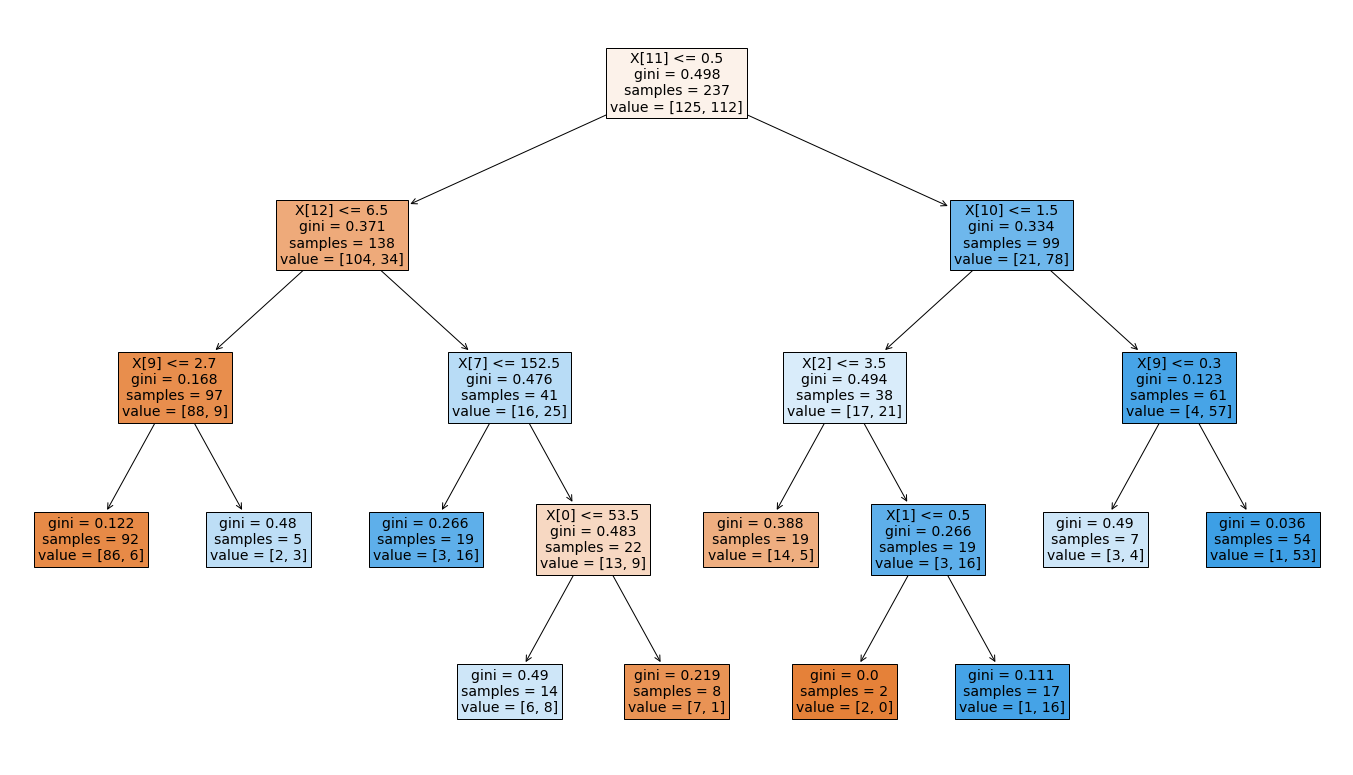

In [86]:
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14);

In [87]:
model = DecisionTreeClassifier(max_features=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_features=5)

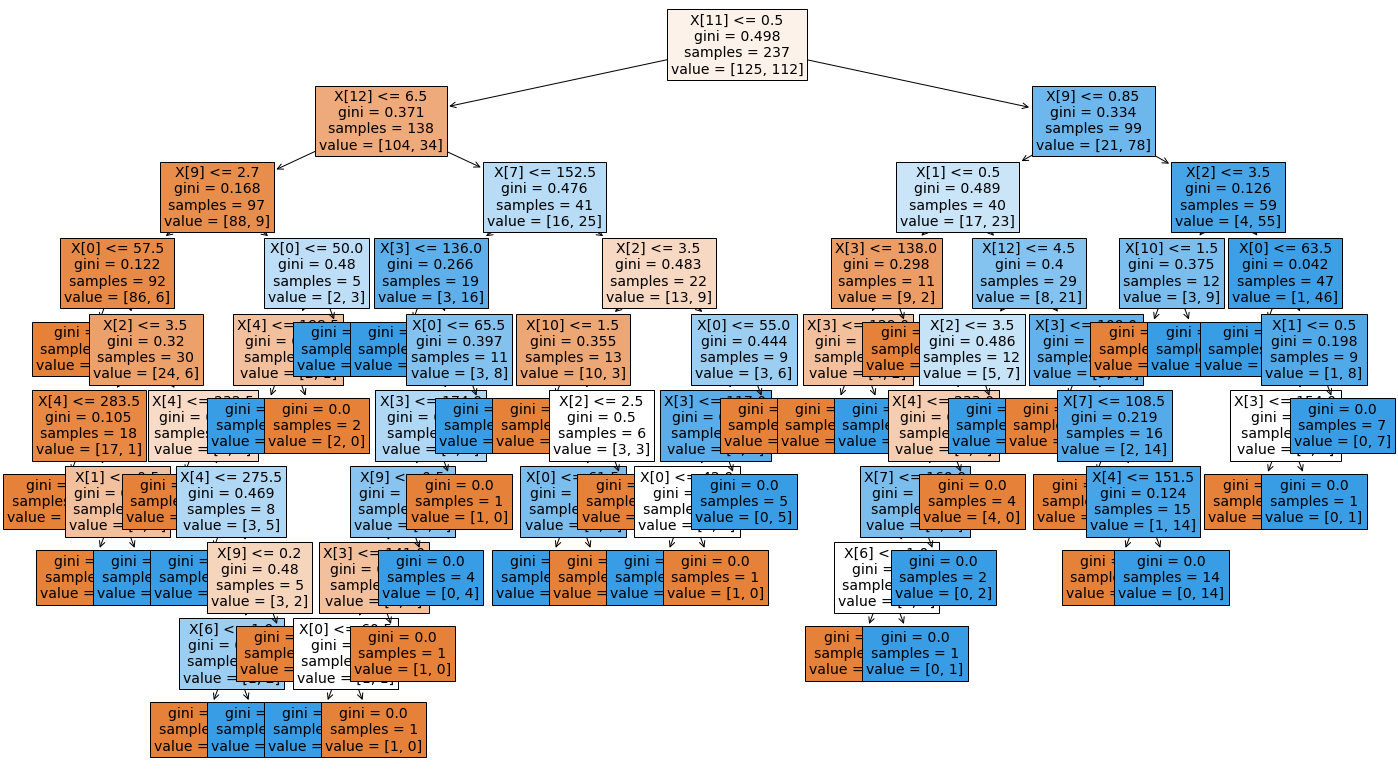

In [88]:
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14);

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 4, 0, 0, 3, 0, 0, 3,
       0, 4, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 1, 1, 3, 0, 0, 0, 0, 2, 0, 1, 4, 3, 3, 3], dtype=int64)

In [34]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5333333333333333